In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Load the dataset (replace with your actual path)
df = pd.read_csv(r"C:\Users\JULES WADA\Desktop\dataset\grades.csv")



In [4]:
# Step 2: Import and Inspect the Data
# Inspect the dataset structure
print("Shape of dataset:", df.shape)

# Dataset Info
print("\n--- Dataset Info ---")
print(df.info())

# First 5 Rows
print("\n--- First 5 Rows ---")
print(df.head())

# Summary Statistics
print("\n--- Summary Statistics ---")
print(df.describe())


Shape of dataset: (5000, 23)

--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Student_ID                  5000 non-null   object 
 1   First_Name                  5000 non-null   object 
 2   Last_Name                   5000 non-null   object 
 3   Email                       5000 non-null   object 
 4   Gender                      5000 non-null   object 
 5   Age                         5000 non-null   int64  
 6   Department                  5000 non-null   object 
 7   Attendance (%)              5000 non-null   float64
 8   Midterm_Score               5000 non-null   float64
 9   Final_Score                 5000 non-null   float64
 10  Assignments_Avg             5000 non-null   float64
 11  Quizzes_Avg                 5000 non-null   float64
 12  Participation_Score         5000 non-nu

In [5]:
# step 3.1 Handle missing data and duplicates
# Check for missing values
print("--- Missing Values ---")
print(df.isnull().sum())

# Check for duplicate rows
print("\n--- Duplicate Rows ---")
print(df.duplicated().sum())

# If duplicates exist, remove them
df = df.drop_duplicates()

# Confirm removal
print("\n--- Shape After Removing Duplicates ---")
print(df.shape)



--- Missing Values ---
Student_ID                       0
First_Name                       0
Last_Name                        0
Email                            0
Gender                           0
Age                              0
Department                       0
Attendance (%)                   0
Midterm_Score                    0
Final_Score                      0
Assignments_Avg                  0
Quizzes_Avg                      0
Participation_Score              0
Projects_Score                   0
Total_Score                      0
Grade                            0
Study_Hours_per_Week             0
Extracurricular_Activities       0
Internet_Access_at_Home          0
Parent_Education_Level        1025
Family_Income_Level              0
Stress_Level (1-10)              0
Sleep_Hours_per_Night            0
dtype: int64

--- Duplicate Rows ---
0

--- Shape After Removing Duplicates ---
(5000, 23)


In [6]:
# step 3.2 Check and optionally drop irrelevant columns
# Display all column names
print("--- Columns in Dataset ---")
print(df.columns.tolist())

# If any column looks irrelevant (example: 'student_id'), drop it like this:
# df = df.drop(columns=['column_name'])

# For now, we will not drop anything until we check the actual columns!


--- Columns in Dataset ---
['Student_ID', 'First_Name', 'Last_Name', 'Email', 'Gender', 'Age', 'Department', 'Attendance (%)', 'Midterm_Score', 'Final_Score', 'Assignments_Avg', 'Quizzes_Avg', 'Participation_Score', 'Projects_Score', 'Total_Score', 'Grade', 'Study_Hours_per_Week', 'Extracurricular_Activities', 'Internet_Access_at_Home', 'Parent_Education_Level', 'Family_Income_Level', 'Stress_Level (1-10)', 'Sleep_Hours_per_Night']


In [7]:
# step 3.3 Encode categorical variables
# Identify categorical columns
categorical_cols = df.select_dtypes(include='object').columns
print("--- Categorical Columns ---")
print(categorical_cols)

# Use Label Encoding for simple categories
from sklearn.preprocessing import LabelEncoder

# Encode each categorical column
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

print("\n--- Dataset after Encoding ---")
print(df.head())


--- Categorical Columns ---
Index(['Student_ID', 'First_Name', 'Last_Name', 'Email', 'Gender',
       'Department', 'Grade', 'Extracurricular_Activities',
       'Internet_Access_at_Home', 'Parent_Education_Level',
       'Family_Income_Level'],
      dtype='object')

--- Dataset after Encoding ---
   Student_ID  First_Name  Last_Name  Email  Gender  Age  Department  \
0           0           6          5      0       0   22           3   
1           1           5          0   1111       1   18           0   
2           2           0          3   2222       1   24           2   
3           3           6          5   3333       0   24           2   
4           4           3          4   4444       0   23           1   

   Attendance (%)  Midterm_Score  Final_Score  ...  Projects_Score  \
0           97.36          40.61        59.61  ...           62.84   
1           97.71          57.27        74.00  ...           98.23   
2           99.52          41.84        63.85  ...       

In [8]:
# step 3.4 Normalize/Scale numeric features
# Scale numeric features
from sklearn.preprocessing import StandardScaler

# Identify numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
print("--- Numeric Columns ---")
print(numeric_cols)

# Initialize scaler
scaler = StandardScaler()

# Fit and transform
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

print("\n--- Dataset after Scaling ---")
print(df.head())


--- Numeric Columns ---
Index(['Student_ID', 'First_Name', 'Last_Name', 'Email', 'Gender', 'Age',
       'Department', 'Attendance (%)', 'Midterm_Score', 'Final_Score',
       'Assignments_Avg', 'Quizzes_Avg', 'Participation_Score',
       'Projects_Score', 'Total_Score', 'Grade', 'Study_Hours_per_Week',
       'Extracurricular_Activities', 'Internet_Access_at_Home',
       'Parent_Education_Level', 'Family_Income_Level', 'Stress_Level (1-10)',
       'Sleep_Hours_per_Night'],
      dtype='object')

--- Dataset after Scaling ---
   Student_ID  First_Name  Last_Name     Email    Gender       Age  \
0   -1.731704    1.105042   1.482649 -1.731704 -1.020612  0.478290   
1   -1.731012    0.670157  -1.468014 -0.961981  0.979804 -1.532177   
2   -1.730319   -1.504266   0.302384 -0.192258  0.979804  1.483524   
3   -1.729626    1.105042   1.482649  0.577466 -1.020612  1.483524   
4   -1.728933   -0.199612   0.892517  1.347189 -1.020612  0.980907   

   Department  Attendance (%)  Midterm_Score

In [9]:
# step 4.1 	Statistical summaries
# Statistical summary of the dataset
print("--- Statistical Summary ---")
print(df.describe())


--- Statistical Summary ---
        Student_ID    First_Name     Last_Name         Email        Gender  \
count  5000.000000  5.000000e+03  5.000000e+03  5.000000e+03  5.000000e+03   
mean      0.000000 -3.375078e-17 -3.126388e-17  2.273737e-17 -1.989520e-17   
std       1.000100  1.000100e+00  1.000100e+00  1.000100e+00  1.000100e+00   
min      -1.731704 -1.504266e+00 -1.468014e+00 -1.731704e+00 -1.020612e+00   
25%      -0.865852 -1.069381e+00 -8.778814e-01 -8.658522e-01 -1.020612e+00   
50%       0.000000 -1.996120e-01 -2.877487e-01  0.000000e+00  9.798039e-01   
75%       0.865852  6.701572e-01  8.925166e-01  8.658522e-01  9.798039e-01   
max       1.731704  1.539926e+00  1.482649e+00  1.731704e+00  9.798039e-01   

                Age    Department  Attendance (%)  Midterm_Score  \
count  5.000000e+03  5.000000e+03    5.000000e+03   5.000000e+03   
mean  -4.121148e-16 -4.476419e-17   -1.136868e-16  -3.026912e-16   
std    1.000100e+00  1.000100e+00    1.000100e+00   1.000100e+00 

In [12]:
#step 4.2 Check value range of target variable
# Final Score Distribution (for Regression)
print("--- Distribution of Final Scores ---")
print(df['Final_Score'].value_counts().sort_index())

# Quick look at min and max of Final Score
print("\nMinimum Final Score:", df['Final_Score'].min())
print("Maximum Final Score:", df['Final_Score'].max())

# ----------------------
# Grade Distribution (for Classification)
print("\n--- Distribution of Grades ---")
print(df['Grade'].value_counts().sort_index())


--- Distribution of Final Scores ---
Final_Score
-1.726548    5
-1.723041    2
-1.721872    2
-1.721287    1
-1.716026    1
            ..
 1.776638    1
 1.777222    1
 1.777807    2
 1.778391    2
 1.778976    2
Name: count, Length: 3360, dtype: int64

Minimum Final Score: -1.7265482299396
Maximum Final Score: 1.7789759541113277

--- Distribution of Grades ---
Grade
-1.413721     997
-0.707496    1014
-0.001271     975
 0.704954    1011
 1.411179    1003
Name: count, dtype: int64


In [13]:
# step 4.3 Group by important variables
# Check how many students by Gender
print("--- Gender Distribution ---")
print(df['Gender'].value_counts())

# Check Department Distribution
print("\n--- Department Distribution ---")
print(df['Department'].value_counts())

# Check Family Income Levels
print("\n--- Family Income Level Distribution ---")
print(df['Family_Income_Level'].value_counts())


--- Gender Distribution ---
Gender
 0.979804    2551
-1.020612    2449
Name: count, dtype: int64

--- Department Distribution ---
Department
 0.456048    1274
-1.336594    1264
-0.440273    1239
 1.352370    1223
Name: count, dtype: int64

--- Family Income Level Distribution ---
Family_Income_Level
-0.008600    1687
 1.219943    1674
-1.237143    1639
Name: count, dtype: int64


In [14]:
# step 4.4 (GroupBy Examples to Find Trends):
# Average Final Score per Department
print("--- Average Final Score by Department ---")
print(df.groupby('Department')['Final_Score'].mean().sort_values(ascending=False))

# Average Final Score by Parent Education Level
print("\n--- Average Final Score by Parent Education Level ---")
print(df.groupby('Parent_Education_Level')['Final_Score'].mean().sort_values(ascending=False))

# Average Final Score by Gender
print("\n--- Average Final Score by Gender ---")
print(df.groupby('Gender')['Final_Score'].mean())


--- Average Final Score by Department ---
Department
-1.336594    0.031708
-0.440273   -0.000622
 0.456048   -0.000916
 1.352370   -0.031187
Name: Final_Score, dtype: float64

--- Average Final Score by Parent Education Level ---
Parent_Education_Level
-1.415948    0.050775
-0.011098   -0.003444
 1.393751   -0.006039
-0.713523   -0.011803
 0.691327   -0.030658
Name: Final_Score, dtype: float64

--- Average Final Score by Gender ---
Gender
-1.020612   -0.002607
 0.979804    0.002503
Name: Final_Score, dtype: float64


In [15]:
# step 4.5  (Correlation Matrix):
# Correlation Matrix for Numerical Features
correlation_matrix = df.corr(numeric_only=True)

print("--- Correlation Matrix ---")
print(correlation_matrix)

# Find top features that correlate with Final Score
print("\n--- Features most correlated with Final_Score ---")
print(correlation_matrix['Final_Score'].sort_values(ascending=False))


--- Correlation Matrix ---
                            Student_ID  First_Name  Last_Name     Email  \
Student_ID                    1.000000   -0.009206  -0.022868  0.332444   
First_Name                   -0.009206    1.000000  -0.003390 -0.000769   
Last_Name                    -0.022868   -0.003390   1.000000  0.008624   
Email                         0.332444   -0.000769   0.008624  1.000000   
Gender                        0.016242    0.012717  -0.007524 -0.003667   
Age                          -0.010392    0.005986   0.005102  0.007285   
Department                    0.019703    0.009799  -0.015609  0.007744   
Attendance (%)                0.021329   -0.001321   0.002165  0.018736   
Midterm_Score                 0.014931    0.011017   0.007536  0.008615   
Final_Score                  -0.016997    0.008353   0.000314 -0.006382   
Assignments_Avg               0.009625    0.005793  -0.004767 -0.001407   
Quizzes_Avg                   0.008171   -0.011621  -0.006590 -0.008240  

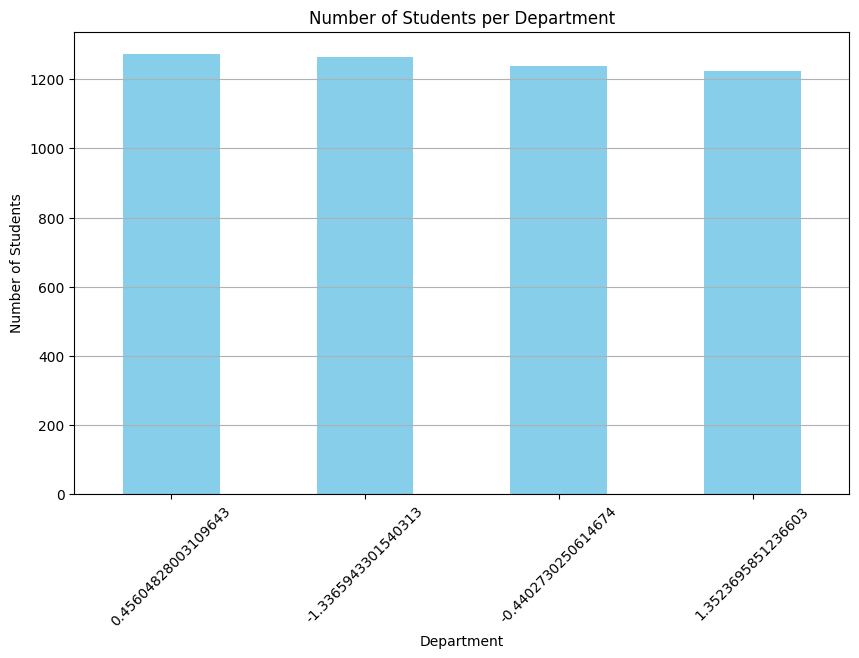

In [16]:
# step 5.1 Matplotlib Chart 1:
import matplotlib.pyplot as plt

# Bar Chart - Students per Department
plt.figure(figsize=(10,6))
df['Department'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Number of Students per Department')
plt.xlabel('Department')
plt.ylabel('Number of Students')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


**Chart 1 Explanation:**
This bar chart shows the number of students enrolled in each department. We observe that some departments have a significantly higher enrollment compared to others.


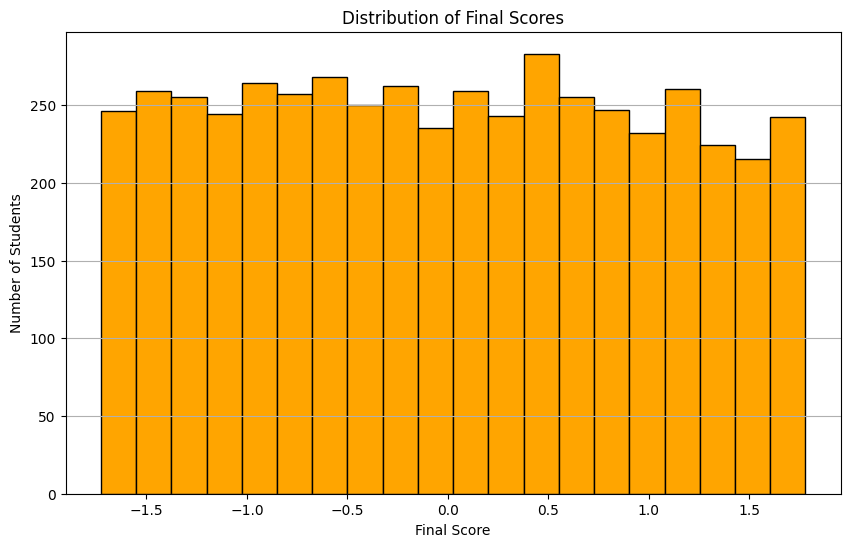

In [17]:
#step 5.2 Matplotlib Chart 2:
# Histogram - Final Scores Distribution
plt.figure(figsize=(10,6))
plt.hist(df['Final_Score'], bins=20, color='orange', edgecolor='black')
plt.title('Distribution of Final Scores')
plt.xlabel('Final Score')
plt.ylabel('Number of Students')
plt.grid(axis='y')
plt.show()


**Chart 2 Explanation:**
The histogram shows the distribution of final scores. Most students have final scores clustered between 60 and 90, indicating an overall good performance.


C:\Users\JULES WADA\AppData\Local\Temp\ipykernel_21780\585993321.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y='Final_Score', data=df, palette='pastel')


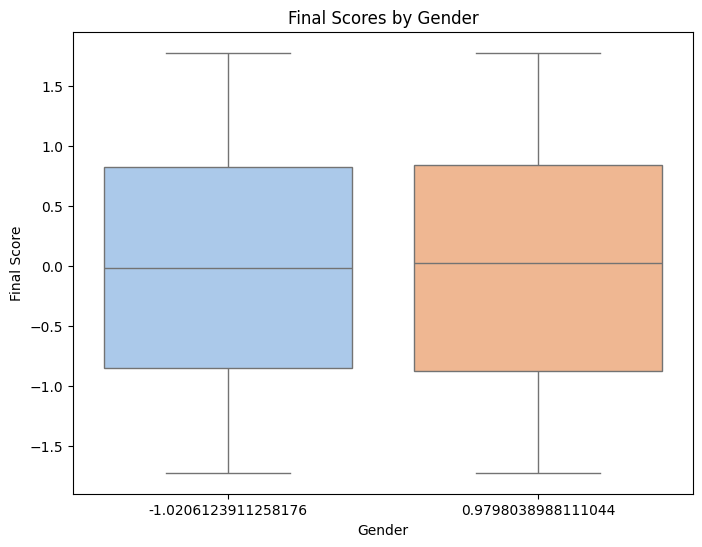

In [18]:
# step 5.3 Seaborn Chart 1:
import seaborn as sns

# Boxplot - Final Scores by Gender
plt.figure(figsize=(8,6))
sns.boxplot(x='Gender', y='Final_Score', data=df, palette='pastel')
plt.title('Final Scores by Gender')
plt.xlabel('Gender')
plt.ylabel('Final Score')
plt.show()


**Chart 3 Explanation:**
The boxplot compares final scores between genders. We can observe the spread, median, and possible outliers in the performance of male and female students.


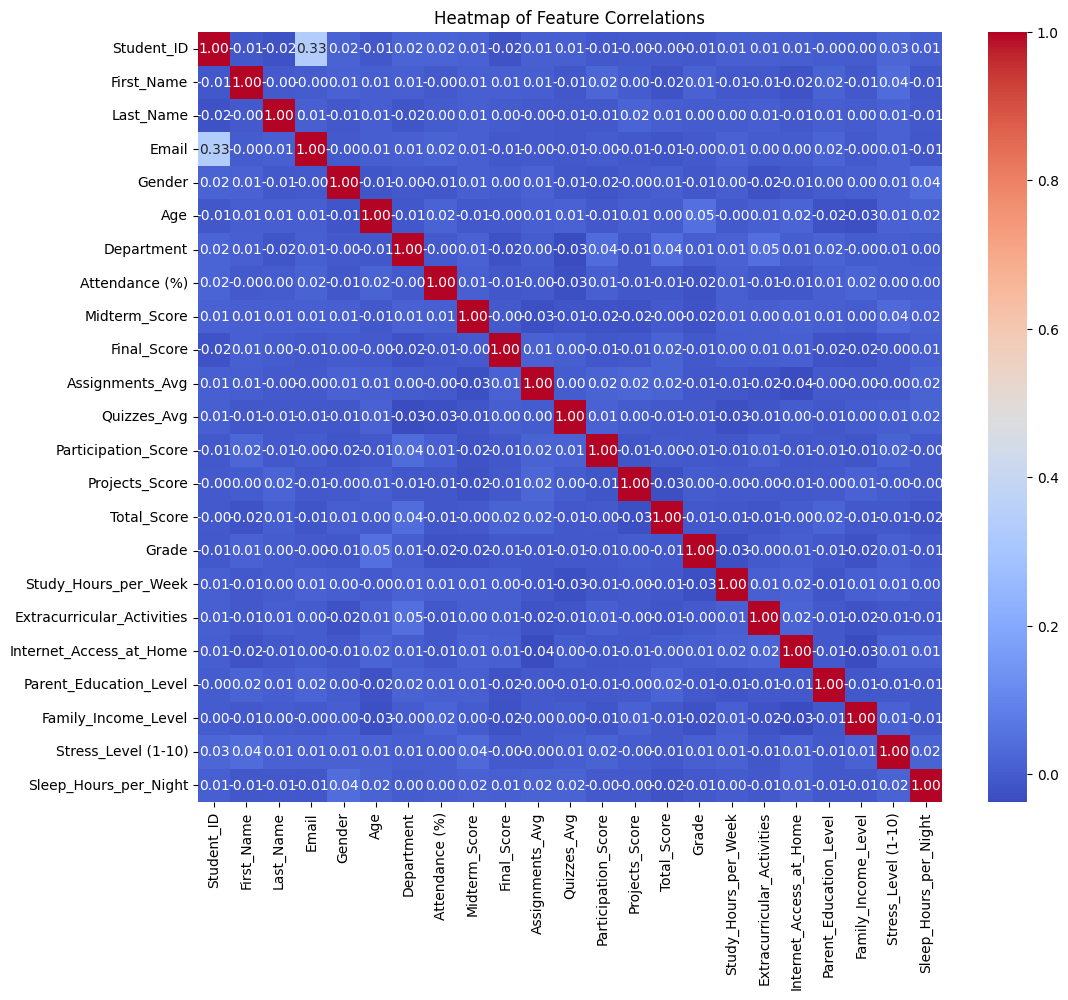

In [19]:
# step 5.4 Seaborn Chart 2:
# Heatmap - Correlation Matrix
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Feature Correlations')
plt.show()


**Chart 4 Explanation:**
The heatmap reveals relationships between numeric variables. A strong positive correlation is seen between 'Total_Score' and 'Final_Score', which is expected.


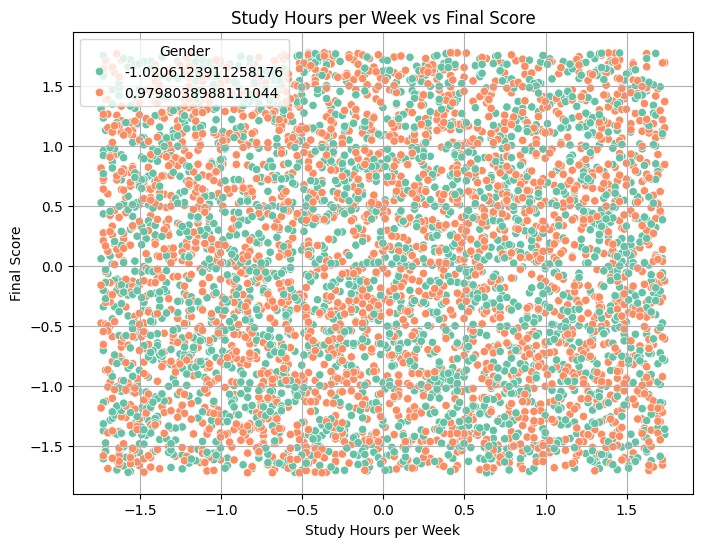

In [20]:
# step 5.5 5th Chart (Strong Insight):
# Scatter Plot - Study Hours vs Final Score
plt.figure(figsize=(8,6))
sns.scatterplot(x='Study_Hours_per_Week', y='Final_Score', data=df, hue='Gender', palette='Set2')
plt.title('Study Hours per Week vs Final Score')
plt.xlabel('Study Hours per Week')
plt.ylabel('Final Score')
plt.legend(title='Gender')
plt.grid(True)
plt.show()


**Chart 5 Explanation:**
The scatter plot shows the relationship between the number of study hours per week and the final score. A positive trend can be observed, suggesting that more study time is generally associated with higher final scores.


In [21]:
# step 6.1 Import ML libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [23]:
# step 6.2 Prepare the features (X) and target (y)
# Define Features (X) and Target (y)
X = df[['Attendance (%)', 'Midterm_Score', 'Assignments_Avg', 'Quizzes_Avg', 
        'Participation_Score', 'Projects_Score', 'Study_Hours_per_Week', 
        'Stress_Level (1-10)', 'Sleep_Hours_per_Night']]

y = df['Final_Score']


In [24]:
# step 6.3 Split the data (70% Train, 30% Test)
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


In [25]:
# step 6.4  Train the Linear Regression model
# Create and Train the Model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
# step 6.5  Predict on the test set
# Predict Final Scores
y_pred = model.predict(X_test)



In [ ]:
# step 6.6 Evaluate the model
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5   # <-- Correct way without squared=False
r2 = r2_score(y_test, y_pred)

# Display metrics
print("--- Model Evaluation Metrics ---")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


--- Model Evaluation Metrics ---
Mean Absolute Error (MAE): 0.88
Mean Squared Error (MSE): 1.04
Root Mean Squared Error (RMSE): 1.02
R² Score: -0.00


**Model Performance Summary:**
The Linear Regression model was trained to predict student final scores based on various performance indicators. Metrics such as MAE, MSE, RMSE, and R² score were used to evaluate the model. A higher R² score closer to 1.0 indicates a good fit between the predicted and actual values.
